# **Proyecto Final Machine Learning**

## **Contextualización:**

### **Introducción:**

En las últimas décadas, el crecimiento acelerado de las áreas urbanas ha generado cambios significativos en los patrones climáticos locales, dando lugar a la formación de microclimas urbanos. Estos microclimas se caracterizan por variaciones en la temperatura, humedad, velocidad del viento y otros factores meteorológicos, que difieren de las condiciones climáticas de las áreas rurales circundantes. Comprender y clasificar estos microclimas es crucial para la planificación urbana, la gestión de recursos energéticos y la mejora de la calidad de vida de los habitantes.

Además, en un contexto global de transición hacia fuentes de energía renovable, la energía solar se ha posicionado como una de las alternativas más prometedoras. Sin embargo, la eficiencia de los sistemas de captación de energía solar depende en gran medida de las condiciones meteorológicas locales, como la radiación solar, la nubosidad y la temperatura. Por lo tanto, predecir con precisión el potencial de energía solar en diferentes áreas urbanas es fundamental para optimizar la instalación de paneles solares y maximizar su rendimiento.

Este proyecto combina técnicas de machine learning para abordar dos problemas clave:

Clasificación de microclimas urbanos: Identificar y categorizar las variaciones climáticas en diferentes barrios de una ciudad.

Predicción de energía solar potencial: Estimar la cantidad de energía solar que puede ser captada en función de las condiciones meteorológicas.

### **Objetivos:**

- **Impacto en la planificación urbana:** La clasificación de microclimas permite identificar áreas con condiciones climáticas extremas (como islas de calor urbanas) y proponer medidas de mitigación, como la creación de espacios verdes o la implementación de techos reflectantes.

- **Optimización de energía renovable:** La predicción de energía solar potencial es esencial para diseñar sistemas de energía solar más eficientes y reducir la dependencia de combustibles fósiles.

- **Contribución científica:** Este proyecto utiliza datos de alta resolución de fuentes como MERRA-2 y CERES SYN1deg, lo que permite un análisis detallado y preciso de las variables meteorológicas. Los resultados están pensados para ser publicados y servir como base para futuras investigaciones.

In [16]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Análisis Exploratorio del dataset:**

In [4]:
# Read CSV data into a DataFrame
df = pd.read_csv('datac.csv')

In [ ]:
# Get the shape of the data
df.shape


(1009056, 19)

In [ ]:
# Print the column names
df.columns

Index(['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'WS10M',
       'WD10M', 'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF',
       'ALLSKY_SRF_ALB', 'T2MDEW', 'T2MWET', 'WS50M', 'ALLSKY_KT', 'Locality',
       'Barrio'],
      dtype='object')

<span style='color:skyblue;font-size:1.50rem;font-weight:bold;'>(1)Parámetros:</span>

- **T2M:** MERRA-2 Temperatura a 2 Metros (°C)
- **RH2M:** MERRA-2 Humedad Relativa a 2 Metros (%)
- **PRECTOTCORR:** MERRA-2 Precipitación Corregida (mm/hora)
- **WS10M:** MERRA-2 Velocidad del Viento a 10 Metros (m/s)
- **WD10M:** MERRA-2 Dirección del Viento a 10 Metros (Grados)
- **PS:** MERRA-2 Presión Superficial (kPa)
- **ALLSKY_SFC_UV_INDEX:** CERES SYN1deg Índice UV en Superficie Bajo Cielo Total (W m-2 x 40)
- **ALLSKY_SFC_SW_DIFF:** CERES SYN1deg Irradiancia Difusa de Onda Corta en Superficie Bajo Cielo Total (Wh/m^2)
- **ALLSKY_SRF_ALB:** CERES SYN1deg Albedo Superficial Bajo Cielo Total (adimensional)
- **T2MDEW:** MERRA-2 Punto de Rocío/Escarcha a 2 Metros (°C)
- **T2MWET:** MERRA-2 Temperatura de Bulbo Húmedo a 2 Metros (°C)
- **WS50M:** MERRA-2 Velocidad del Viento a 50 Metros (m/s)
- **ALLSKY_KT:** CERES SYN1deg Índice de Claridad de Insolación Bajo Cielo Total (adimensional)						


--------

En el análisis de datos meteorológicos y climáticos, es común encontrar **valores faltantes** que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes. Estos valores en este caso han sido representados con un código específico, como **-999**, para indicar su ausencia. En este contexto, se trabajó con un conjunto de <span style="color:skyblue;">**(1)Parámetros clave**</span>. Estos mismos, provenientes de fuentes como **MERRA-2** y **CERES SYN1deg**, son fundamentales para estudios climáticos, pero requieren un manejo cuidadoso de los **valores faltantes** para garantizar la precisión y confiabilidad de los análisis.

In [ ]:
# Data types of columns
df.dtypes

YEAR                     int64
MO                       int64
DY                       int64
HR                       int64
T2M                    float64
RH2M                   float64
PRECTOTCORR            float64
WS10M                  float64
WD10M                  float64
PS                     float64
ALLSKY_SFC_UV_INDEX    float64
ALLSKY_SFC_SW_DIFF     float64
ALLSKY_SRF_ALB         float64
T2MDEW                 float64
T2MWET                 float64
WS50M                  float64
ALLSKY_KT              float64
Locality                object
Barrio                  object
dtype: object

In [ ]:
# Check for null values
print(df.isnull().sum())

YEAR                   0
MO                     0
DY                     0
HR                     0
T2M                    0
RH2M                   0
PRECTOTCORR            0
WS10M                  0
WD10M                  0
PS                     0
ALLSKY_SFC_UV_INDEX    0
ALLSKY_SFC_SW_DIFF     0
ALLSKY_SRF_ALB         0
T2MDEW                 0
T2MWET                 0
WS50M                  0
ALLSKY_KT              0
Locality               0
Barrio                 0
dtype: int64


In [9]:
# Count occurrences of -999 in each column
count_neg_999 = (df == -999).sum()
print("\nCount of -999 values in each column:")
print(count_neg_999)


Count of -999 values in each column:
YEAR                        0
MO                          0
DY                          0
HR                          0
T2M                         0
RH2M                        0
PRECTOTCORR                 0
WS10M                       0
WD10M                       0
PS                          0
ALLSKY_SFC_UV_INDEX     85785
ALLSKY_SFC_SW_DIFF      85560
ALLSKY_SRF_ALB         534770
T2MDEW                      0
T2MWET                      0
WS50M                       0
ALLSKY_KT              534770
Locality                    0
Barrio                      0
dtype: int64


In [13]:
# Seleccionar solo las columnas numéricas para evitar modificar las categóricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Reemplazar -999.0 por NaN SOLO en las columnas numéricas
df_cleaned = df.copy()  # Crear una copia del dataframe original
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].replace(-999.0, np.nan)

# Calcular los datos faltantes sin modificar las columnas de texto
missing_per_col = df_cleaned.isnull().sum() / len(df_cleaned) * 100  # % de valores faltantes por columna

# Calcular porcentaje total de datos faltantes
total_missing = df_cleaned.isnull().sum().sum()
total_values = df_cleaned.size
missing_percentage = (total_missing / total_values) * 100

print("Porcentaje de datos faltantes por variable:\n", missing_per_col)
print("\nPorcentaje total de datos faltantes:", round(missing_percentage, 2), "%")

Porcentaje de datos faltantes por variable:
 YEAR                    0.000000
MO                      0.000000
DY                      0.000000
HR                      0.000000
T2M                     0.000000
RH2M                    0.000000
PRECTOTCORR             0.000000
WS10M                   0.000000
WD10M                   0.000000
PS                      0.000000
ALLSKY_SFC_UV_INDEX     8.501510
ALLSKY_SFC_SW_DIFF      8.479212
ALLSKY_SRF_ALB         52.997059
T2MDEW                  0.000000
T2MWET                  0.000000
WS50M                   0.000000
ALLSKY_KT              52.997059
Locality                0.000000
Barrio                  0.000000
dtype: float64

Porcentaje total de datos faltantes: 6.47 %


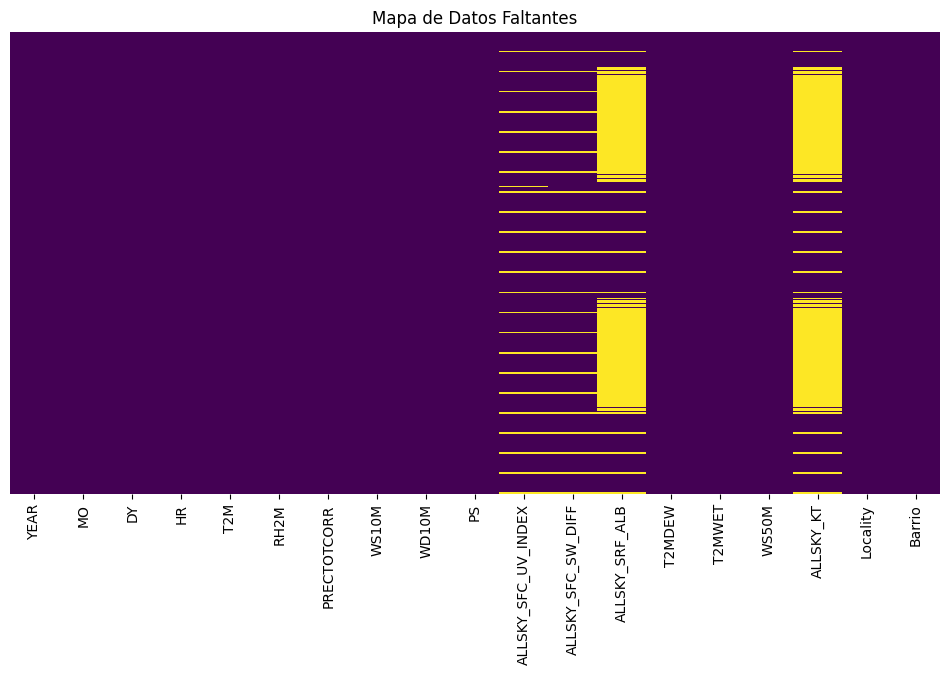

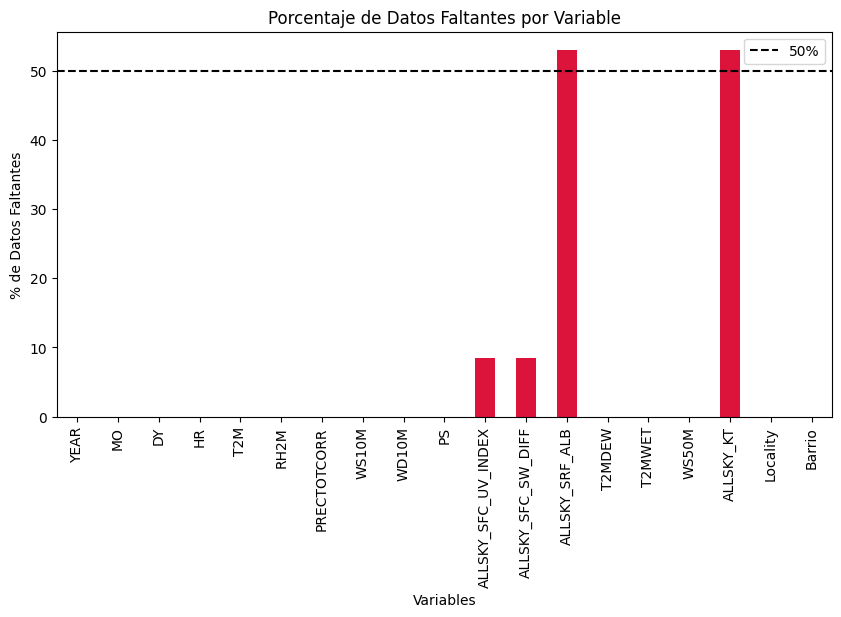

In [17]:
# Visualizar los datos faltantes con un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de Datos Faltantes")
plt.show()

# Visualizar los datos faltantes por variable
plt.figure(figsize=(10, 5))
missing_per_col.plot(kind="bar", color="crimson")
plt.axhline(y=50, color="black", linestyle="--", label="50%")
plt.xlabel("Variables")
plt.ylabel("% de Datos Faltantes")
plt.title("Porcentaje de Datos Faltantes por Variable")
plt.legend()
plt.show()

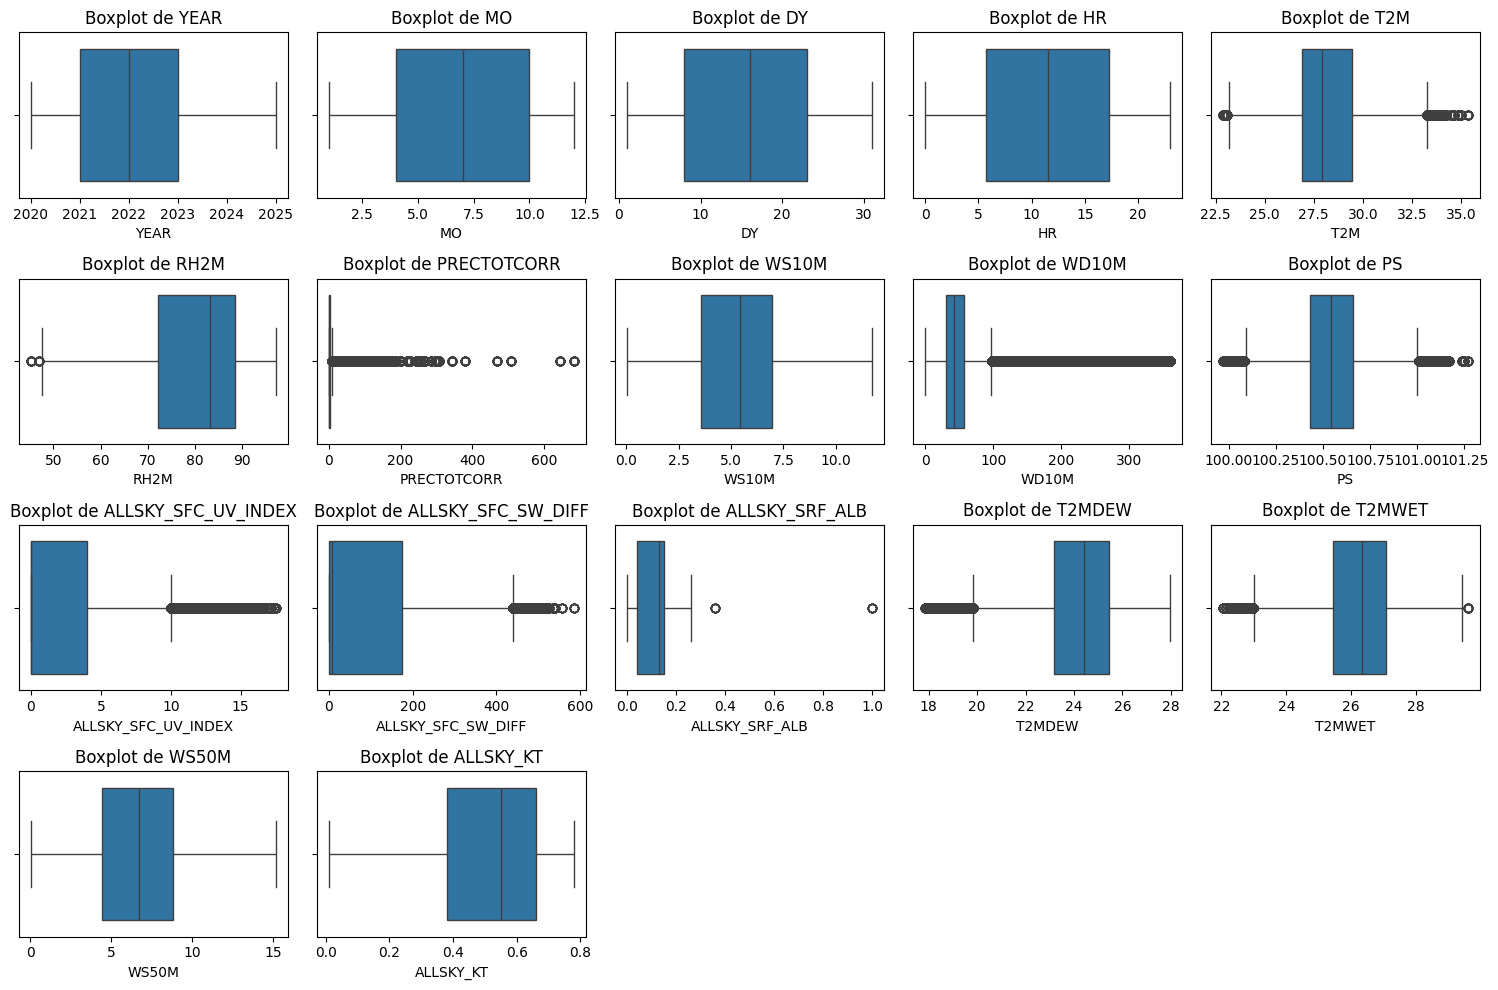

In [18]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Crear un boxplot para cada variable numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)  # Ajusta el número de filas y columnas según la cantidad de variables
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

In [14]:
# Get the first 5 rows of the data
df_cleaned.head()

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DIFF,ALLSKY_SRF_ALB,T2MDEW,T2MWET,WS50M,ALLSKY_KT,Locality,Barrio
0,2020,1,1,0,26.66,86.19,0.03,7.87,40.0,100.66,0.0,0.0,NaN,24.19,25.42,10.13,NaN,Centro,CentroHistData
1,2020,1,1,1,26.56,85.81,0.03,8.02,41.8,100.58,0.0,0.0,NaN,24.01,25.29,10.31,NaN,Centro,CentroHistData
2,2020,1,1,2,26.43,85.59,0.02,8.05,42.7,100.52,0.0,0.0,NaN,23.84,25.14,10.33,NaN,Centro,CentroHistData
3,2020,1,1,3,26.35,84.96,0.00,8.01,43.7,100.49,0.0,0.0,NaN,23.63,24.99,10.25,NaN,Centro,CentroHistData
4,2020,1,1,4,26.27,84.21,0.00,7.88,45.6,100.49,0.0,0.0,NaN,23.42,24.85,10.08,NaN,Centro,CentroHistData


In [19]:
# Describe the data
round(df_cleaned.describe(),2)

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DIFF,ALLSKY_SRF_ALB,T2MDEW,T2MWET,WS50M,ALLSKY_KT
count,1009056.00,1009056.00,1009056.00,1009056.00,1009056.00,1009056.00,1009056.00,1009056.00,1009056.00,1009056.00,923271.00,923496.00,474286.00,1009056.00,1009056.00,1009056.00,474286.00
mean,2022.00,6.52,15.73,11.50,28.21,79.92,3.40,5.29,66.46,100.55,2.40,91.33,0.10,24.25,26.23,6.64,0.51
std,1.42,3.45,8.81,6.92,1.82,10.55,12.21,2.21,76.95,0.17,3.76,117.44,0.06,1.54,1.17,2.84,0.17
min,2020.00,1.00,1.00,0.00,22.88,45.22,0.00,0.04,0.00,99.97,0.00,0.00,0.00,17.85,22.05,0.04,0.01
25%,2021.00,4.00,8.00,5.75,26.91,72.16,0.01,3.56,30.30,100.43,0.00,0.00,0.04,23.19,25.44,4.44,0.38
50%,2022.00,7.00,16.00,11.50,27.93,83.16,0.52,5.41,42.00,100.54,0.00,7.68,0.13,24.43,26.33,6.73,0.55
75%,2023.00,10.00,23.00,17.25,29.46,88.64,2.94,6.97,57.20,100.66,4.00,175.48,0.15,25.43,27.08,8.79,0.66
max,2025.00,12.00,31.00,23.00,35.36,97.26,684.23,11.72,359.80,101.27,17.52,585.10,1.00,27.97,29.61,15.15,0.78


In [36]:
# Crear un diccionario para almacenar los barrios por localidad
barrios_por_localidad = df_cleaned.groupby('Locality')['Barrio'].unique().to_dict()

# Imprimir los barrios por localidad
for localidad, barrios in barrios_por_localidad.items():
    print(f"Localidad: {localidad}")
    for barrio in barrios:
        print(f"  - {barrio}")

Localidad: Centro
  - CentroHistData
  - CiudadJardinData
  - ElPradoData
  - SanRoqueData
Localidad: Estratégico
  - ElGolfData
  - LasNievesData
  - SimonBolivarData
Localidad: Norte
  - AltosDelPradoData
  - AltosDeRiomarData
  - BostonData
  - ElCountryData
  - RiomarData
Localidad: Occidente
  - LaPlayaData
  - LasFloresData
  - MaleconData
Localidad: Oriente
  - ELBosqueData
  - LaVictoriaData
  - LosAndesData
  - LosOlivosData
Localidad: Sur
  - ElCampitoData
  - LasAmericasData
  - LaSierritaData
  - VillaSantosData


In [ ]:
# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

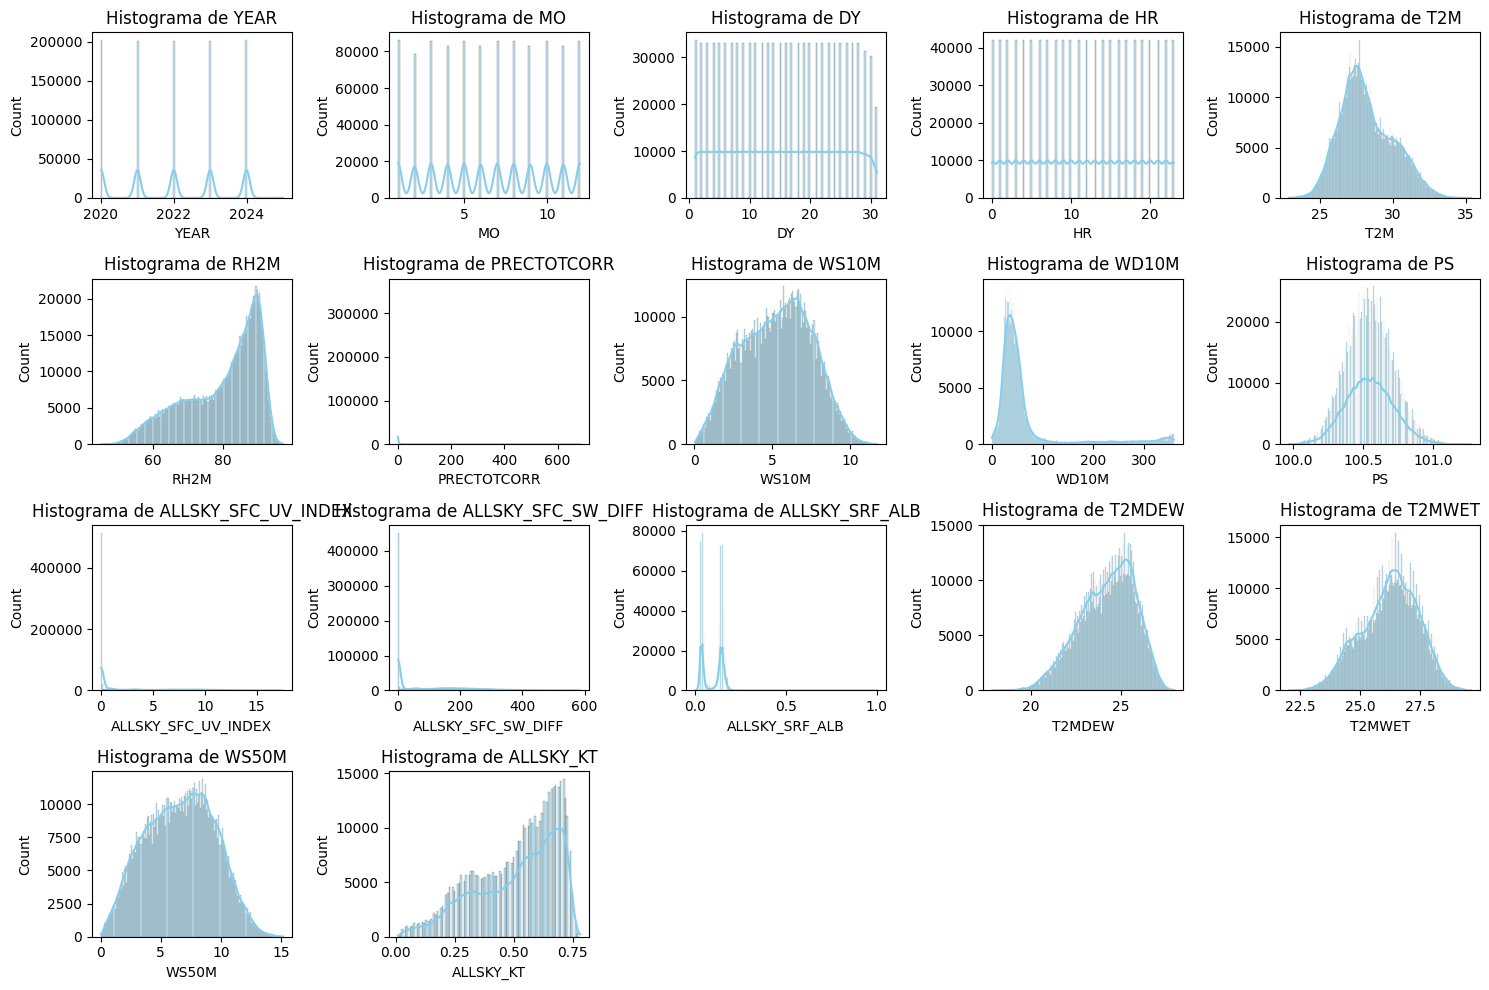

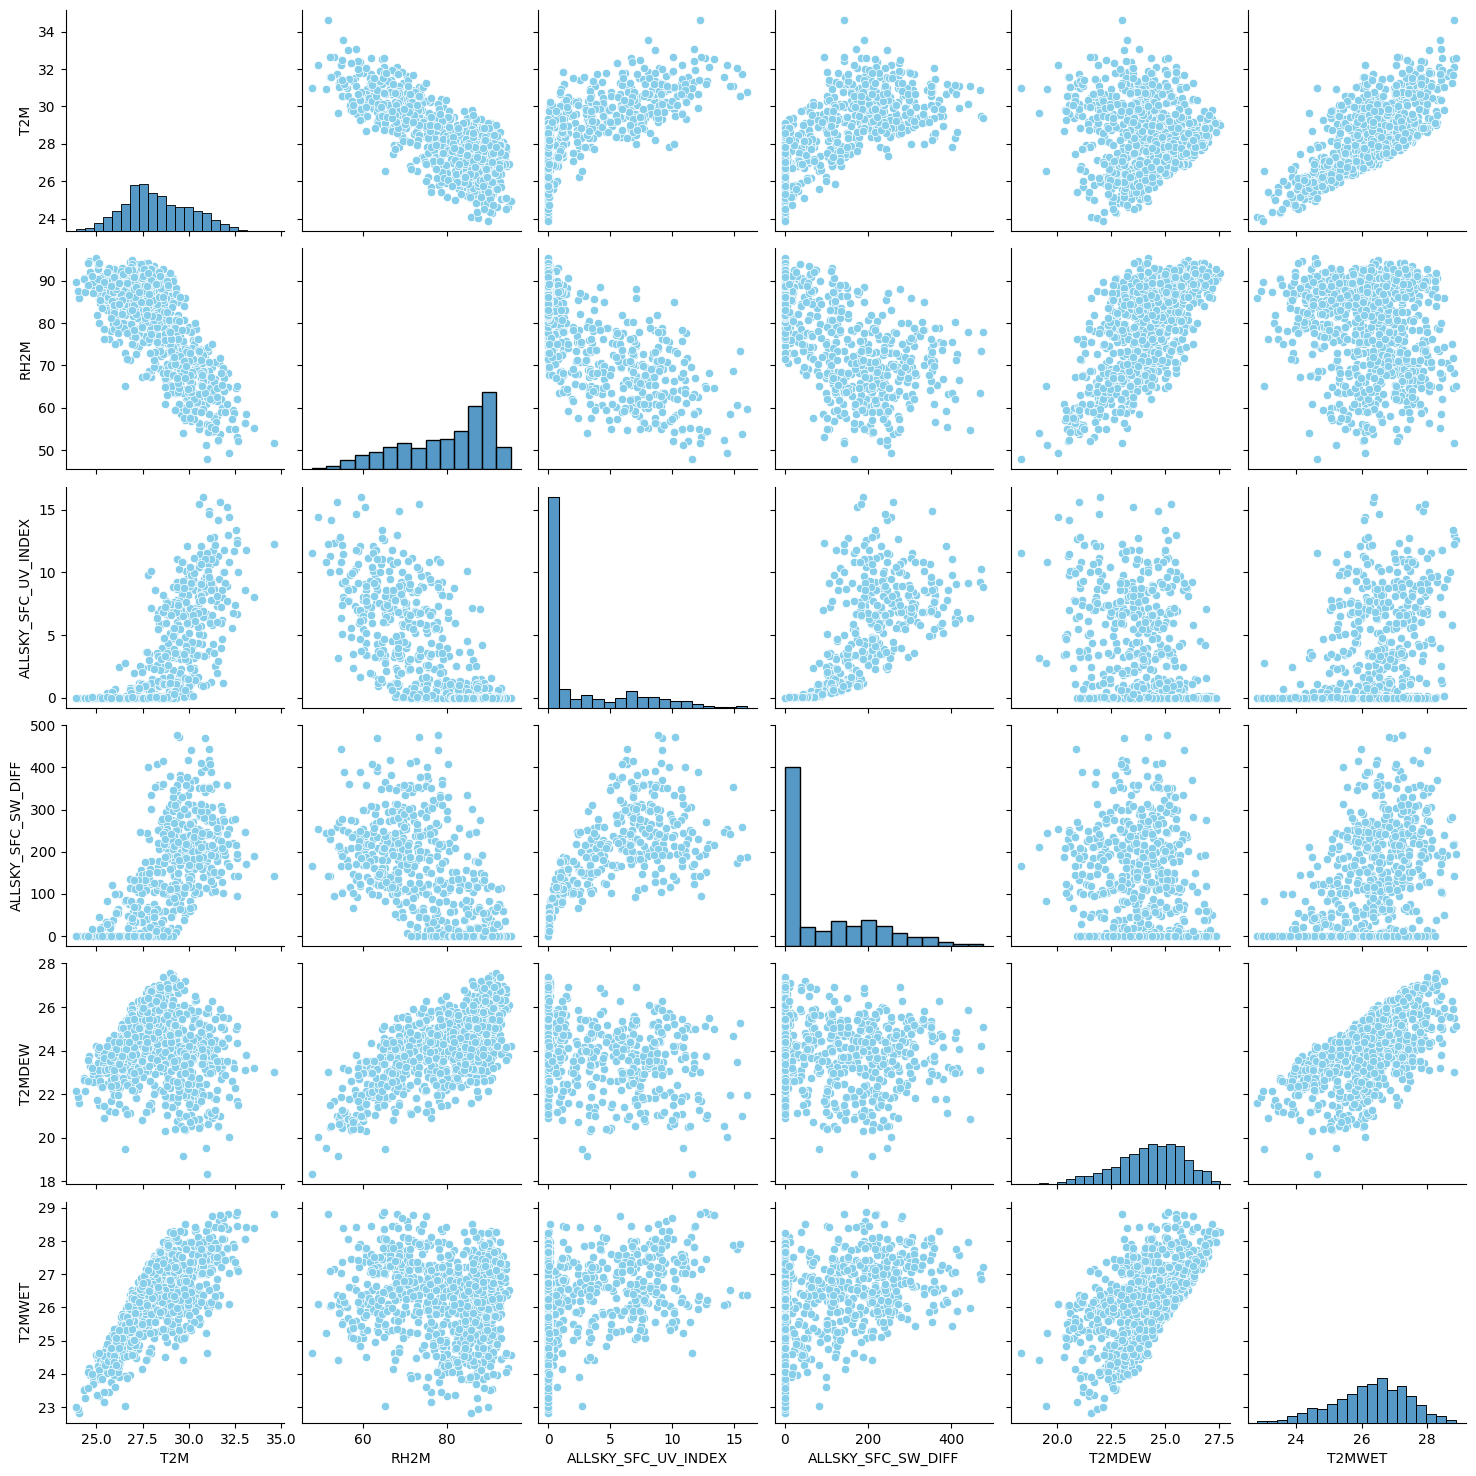

Número de outliers por variable:
 YEAR                        0
MO                          0
DY                          0
HR                          0
T2M                      2553
RH2M                       46
PRECTOTCORR            107226
WS10M                       0
WD10M                  123050
PS                       6578
ALLSKY_SFC_UV_INDEX     59403
ALLSKY_SFC_SW_DIFF       6044
ALLSKY_SRF_ALB             18
T2MDEW                   3013
T2MWET                   2369
WS50M                       0
ALLSKY_KT                   0
dtype: int64


C:\Users\jesus\AppData\Local\Temp\ipykernel_35844\2582827616.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="viridis")
C:\Users\jesus\AppData\Local\Temp\ipykernel_35844\2582827616.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x=col, palette="viridis")


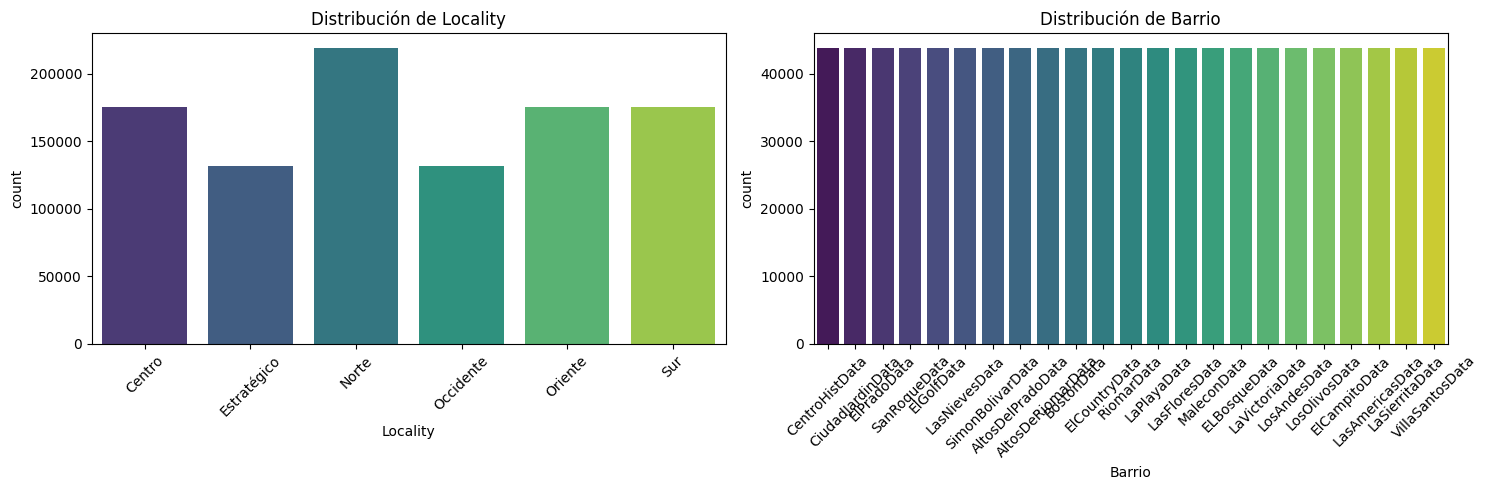

In [24]:
# Histogramas para ver la distribución de las variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df_cleaned[col].dropna(), kde=True, color="skyblue")
    plt.title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

# Gráficos de dispersión para ver la relación entre las variables más importantes
important_vars = ['T2M', 'RH2M', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF', 'T2MDEW', 'T2MWET']

sns.pairplot(df_cleaned[important_vars].sample(1000), plot_kws={'color': 'skyblue'})  # Muestra aleatoria de 1000 filas para mejorar la visualización
plt.show()

# Análisis de outliers usando el método IQR
Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por variable:\n", outliers)

# Análisis de la distribución de las variables categóricas
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df_cleaned, x=col, palette="viridis")
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

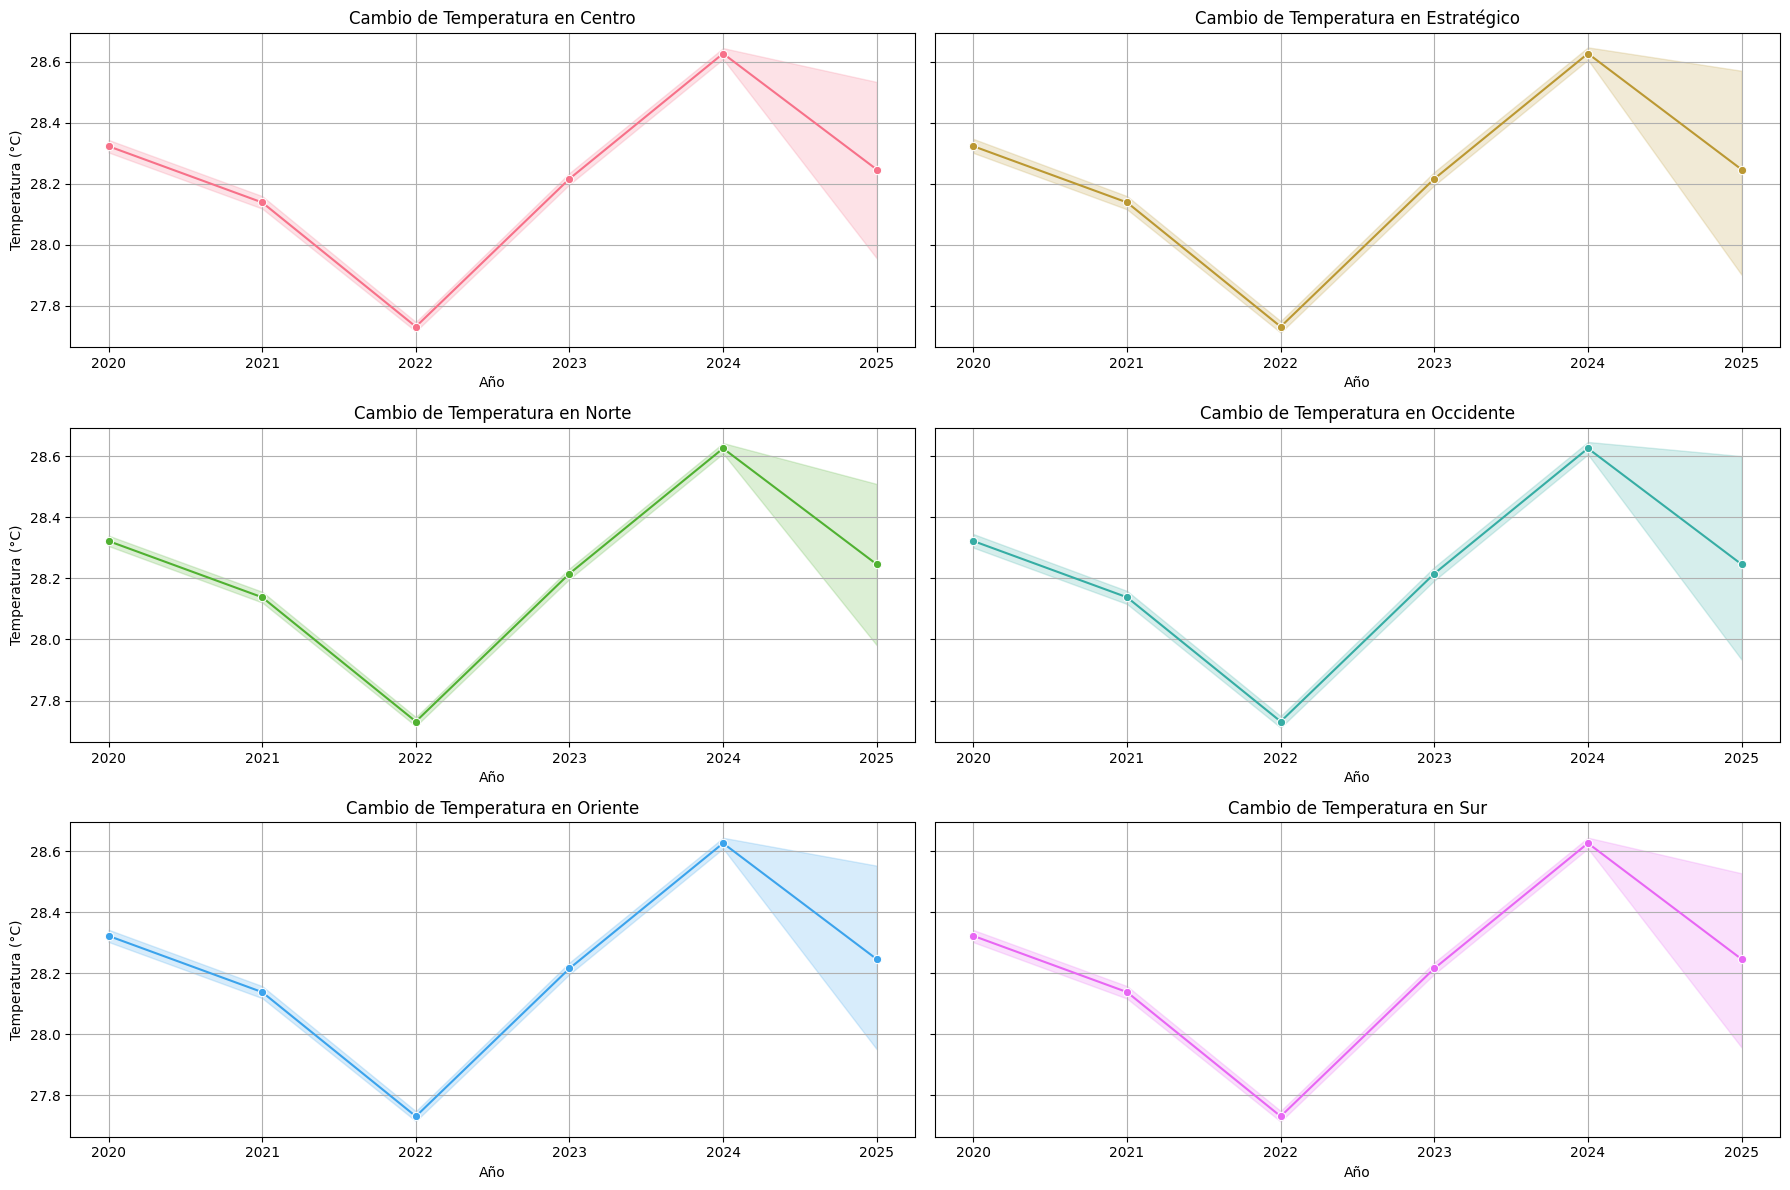

In [ ]:
# Obtener las localidades únicas
localidades = df_cleaned['Locality'].unique()

# Crear una figura con 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12), sharey=True)

# Definir una paleta de colores
palette = sns.color_palette("husl", len(localidades))

# Iterar sobre las localidades y crear un gráfico para cada una
for i, localidad in enumerate(localidades[:6]):
    ax = axes[i//2, i%2]
    sns.lineplot(data=df_cleaned[df_cleaned['Locality'] == localidad], x='YEAR', y='T2M', marker='o', ax=ax, color=palette[i])
    ax.set_title(f'Cambio de Temperatura en {localidad}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Temperatura (°C)')
    ax.grid(True)

plt.tight_layout()
plt.show()

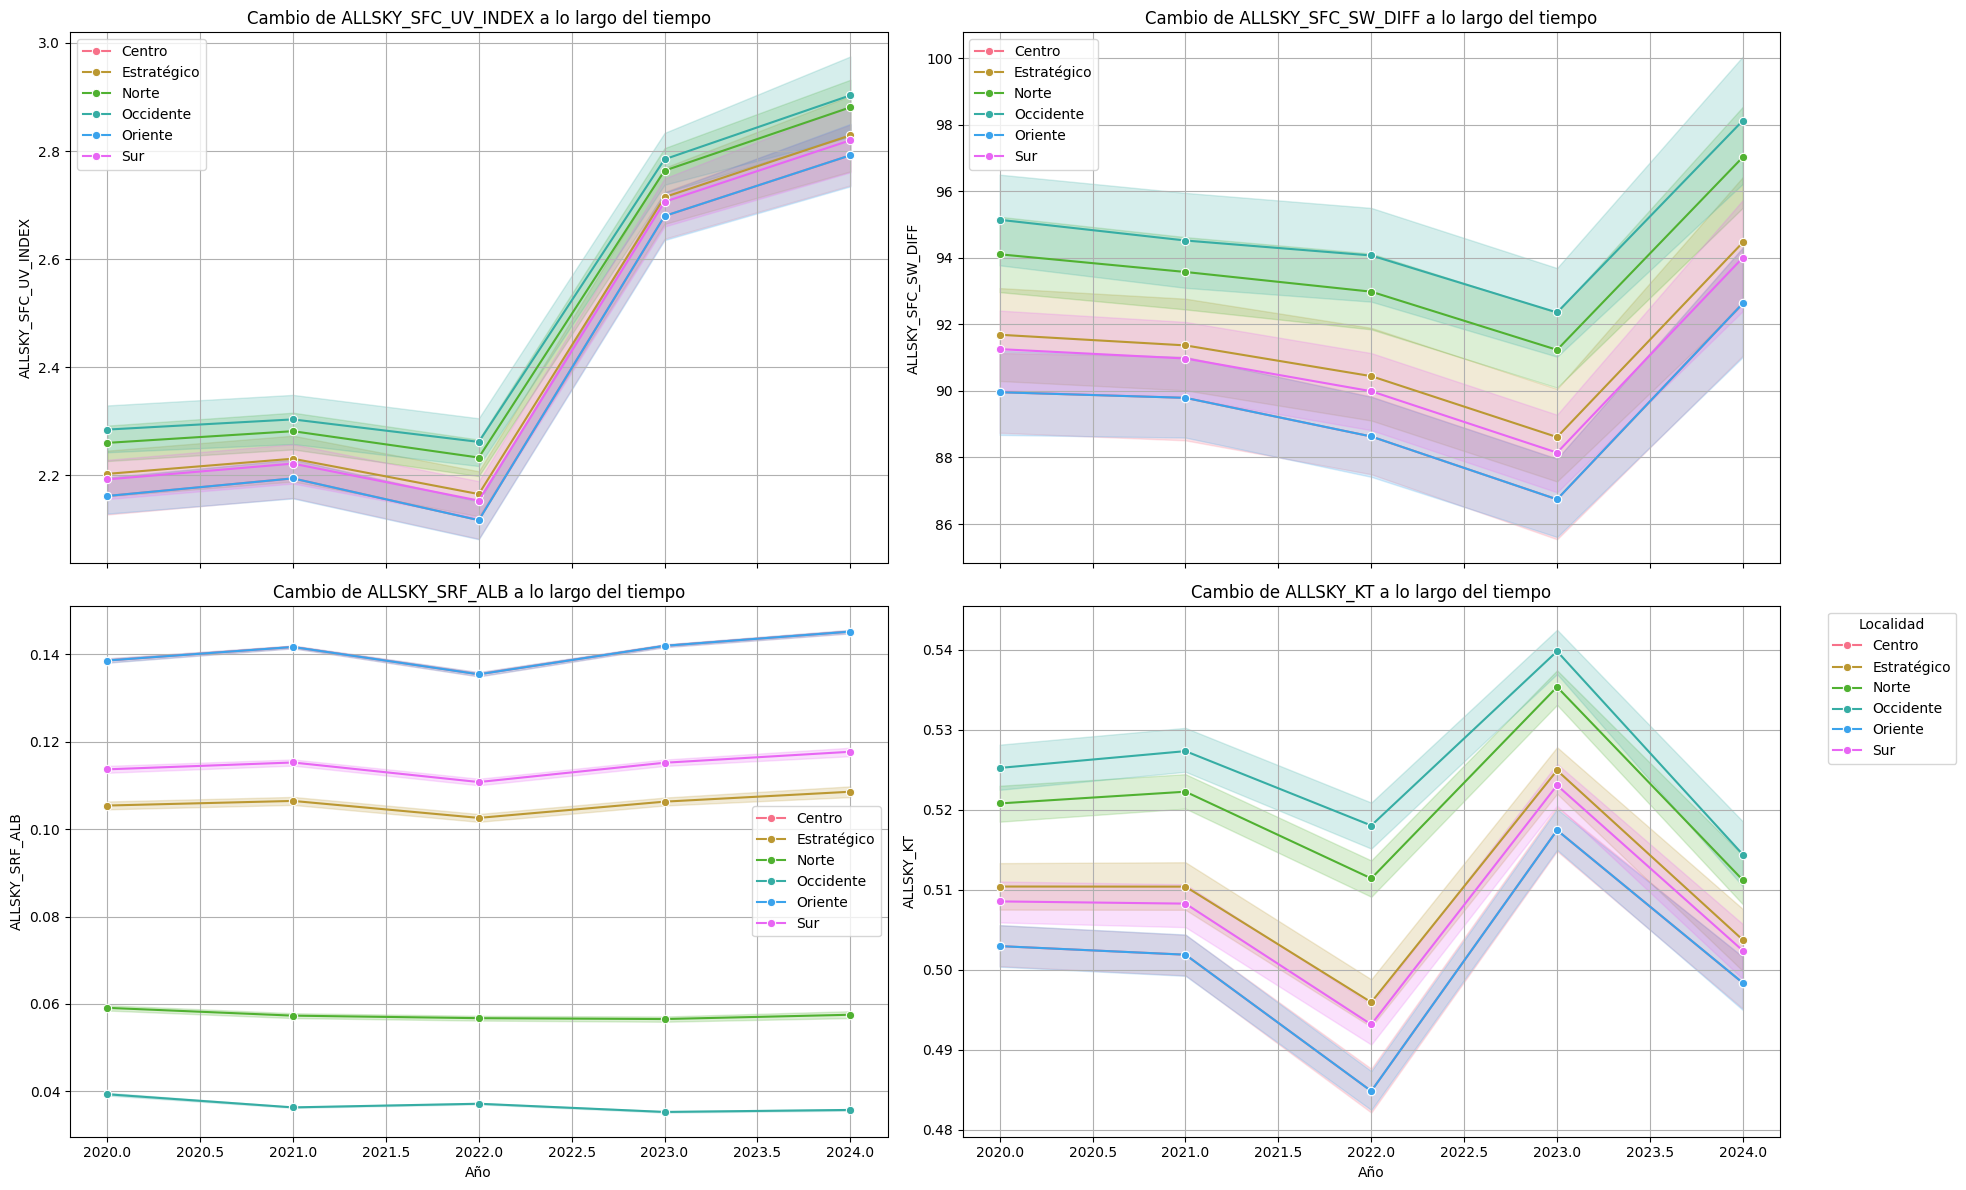

In [30]:
# Definir las variables relacionadas con el aprovechamiento de la energía solar
solar_vars = ['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF', 'ALLSKY_SRF_ALB', 'ALLSKY_KT']

# Crear una figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True)

# Iterar sobre las variables solares y crear un gráfico para cada una
for i, var in enumerate(solar_vars):
    ax = axes[i//2, i%2]
    for j, localidad in enumerate(localidades):
        sns.lineplot(data=df_cleaned[df_cleaned['Locality'] == localidad], x='YEAR', y=var, marker='o', ax=ax, label=localidad, color=palette[j])
    ax.set_title(f'Cambio de {var} a lo largo del tiempo')
    ax.set_xlabel('Año')
    ax.set_ylabel(var)
    ax.grid(True)

plt.tight_layout()
plt.legend(title='Localidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

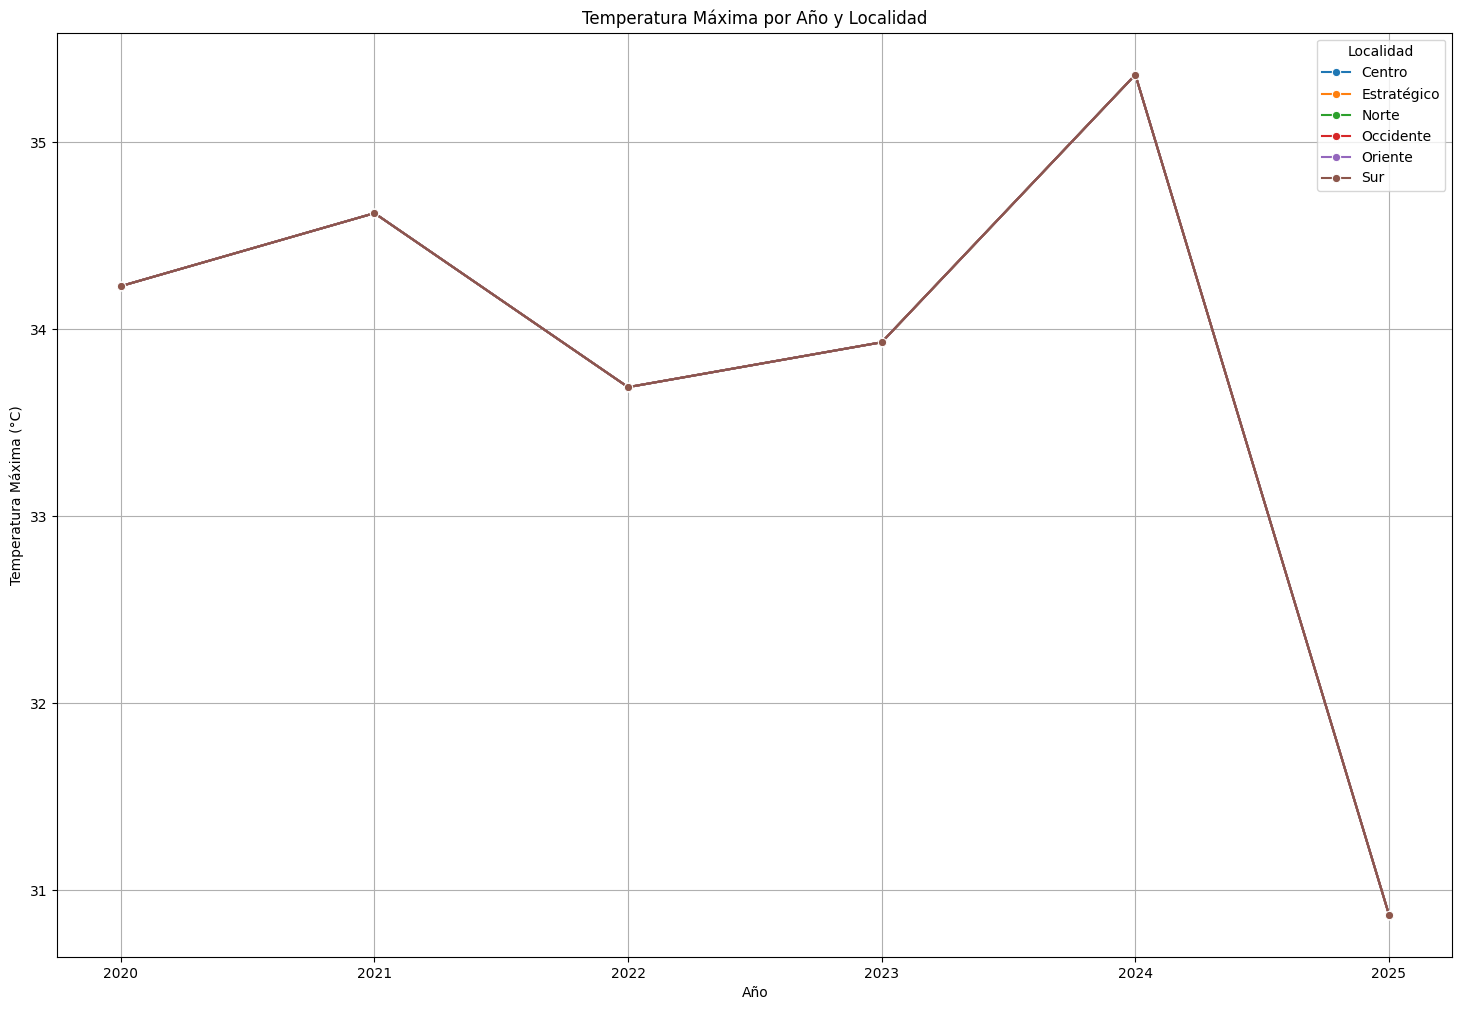

In [33]:
# Calcular la temperatura máxima por año y localidad
max_temp_per_year_locality = df_cleaned.groupby(['YEAR', 'Locality'])['T2M'].max().reset_index()

# Crear una figura para el gráfico de líneas
plt.figure(figsize=(18, 12))

# Iterar sobre las localidades y crear un gráfico de líneas para cada una
for localidad in localidades:
    data = max_temp_per_year_locality[max_temp_per_year_locality['Locality'] == localidad]
    sns.lineplot(data=data, x='YEAR', y='T2M', marker='o', label=localidad)

plt.title('Temperatura Máxima por Año y Localidad')
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima (°C)')
plt.legend(title='Localidad')
plt.grid(True)
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

avg_temp_per_year_locality = df_cleaned.groupby(['YEAR', 'Locality'])['T2M'].mean().reset_index()


mapa_localidades = gpd.read_file('localidades.shp')

# Crear un GeoDataFrame con los datos de temperatura
gdf_temp = gpd.GeoDataFrame(avg_temp_per_year_locality, geometry=gpd.points_from_xy(df_cleaned['LONG'], df_cleaned['LAT']))

# Unir los datos de temperatura con el mapa de localidades
mapa_localidades = mapa_localidades.merge(gdf_temp, on='Locality')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
mapa_localidades.plot(column='T2M', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Temperatura Media (°C)"})
plt.title('Comportamiento de la Temperatura en las Localidades')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()

DataSourceError: localidades.shp: No such file or directory

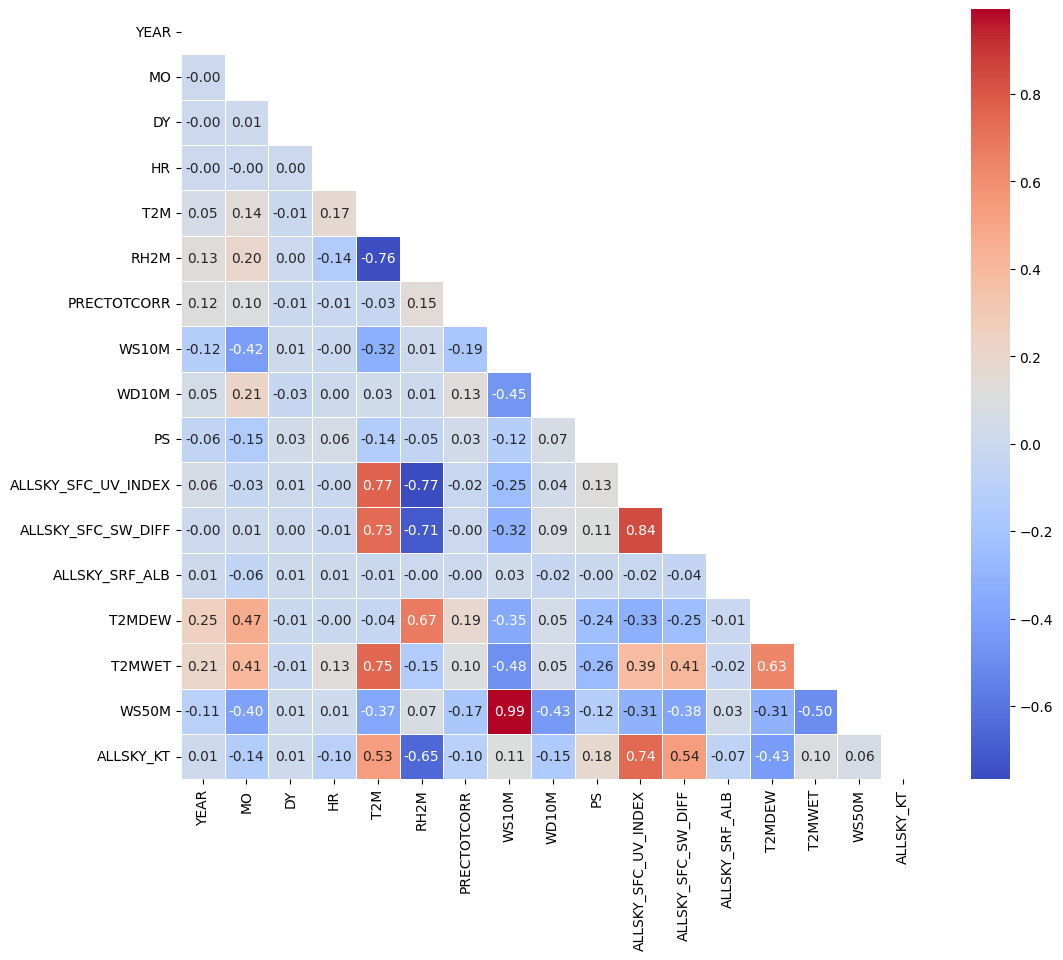

In [22]:
# Calcular la matriz de correlación solo con las columnas numéricas
corr_matrix = df_cleaned[numeric_cols].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask, annot= True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()
